In [36]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_set2=pd.read_csv("C:/Users/SNU/Downloads/framingham.csv")
df = pd.DataFrame(data_set2)

data_set = df.fillna(0)
data_set

x=data_set.iloc[:, [1, 4]].values
y=data_set.iloc[:, 15].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.25, random_state=0)

#feature scaling
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
X_train=st_x.fit_transform(X_train)
X_test=st_x.fit_transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [37]:
#Predicting the test result
y_pred=classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[835,  55],
       [156,  14]], dtype=int64)

C:\Users\SNU\AppData\Local\Temp\ipykernel_4136\3614948549.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set==j, 0], x_set[y_set==j, 1], c=ListedColormap(('red', 'green'))(i), label=j)


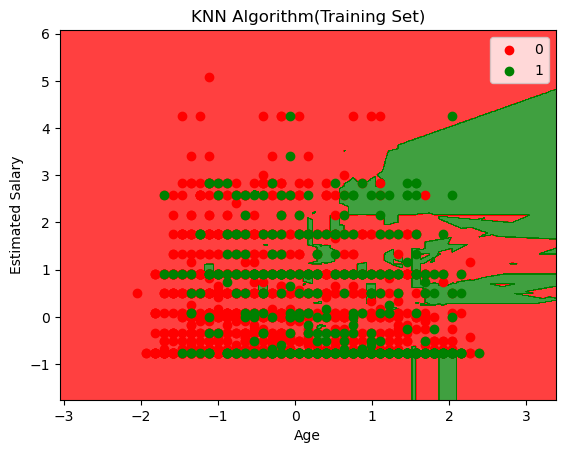

In [38]:
from matplotlib.colors import ListedColormap
x_set, y_set =X_train, y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min()-1, stop=x_set[:, 0].max()+1, step=.01), np.arange(start=x_set[:, 1].min()-1, stop=x_set[:, 1].max()+1, step=.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha=.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j, 0], x_set[y_set==j, 1], c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('KNN Algorithm(Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

C:\Users\SNU\AppData\Local\Temp\ipykernel_4136\3491350756.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set==j, 0], x_set[y_set==j, 1], c=ListedColormap(('red', 'green'))(i), label=j)


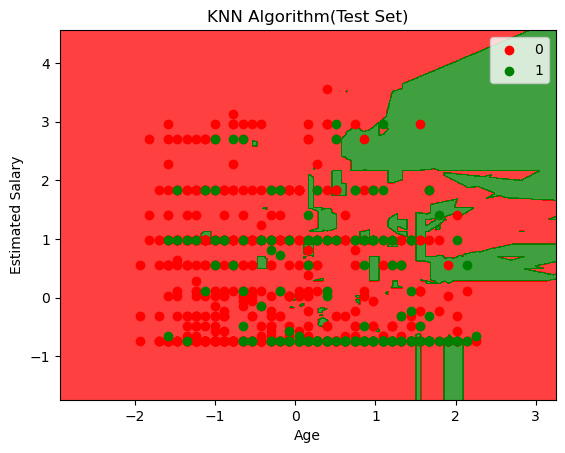

In [40]:
from matplotlib.colors import ListedColormap
x_set, y_set =X_test, y_test
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min()-1, stop=x_set[:, 0].max()+1, step=.01), np.arange(start=x_set[:, 1].min()-1, stop=x_set[:, 1].max()+1, step=.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha=.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j, 0], x_set[y_set==j, 1], c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('KNN Algorithm(Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()